In [1]:
import random
import time
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output, display

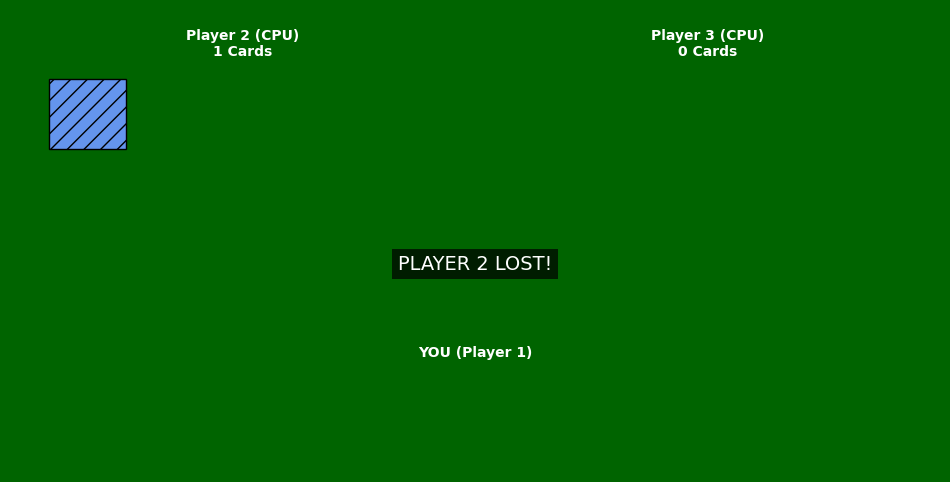

GAME HISTORY
> Player 2 FOUND A PAIR!
> Player 3 is stealing from Player 2.
> Player 3 FOUND A PAIR!
> YOUR TURN!
> You stole Ace♦ from Player 3.
> YOU GOT A PAIR!
> Player 2 is stealing from Player 3.
> Player 2 FOUND A PAIR!
> GAME OVER! Player 2 lost with 3♥
> The Poop Card was: 3♣
------------------------------------------------------------


In [2]:
# -------------------- GLOBAL LOG  --------------------
game_log = []

def add_log(message):
    game_log.append(f"> {message}")
    if len(game_log) > 15:
        game_log.pop(0)

def draw_table(h1, h2, h3, status_msg=""):
    plt.close('all') 
    clear_output(wait=True)
    
    fig, ax = plt.subplots(figsize=(12, 6)) 
    
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    ax.set_facecolor('#006400') 
    fig.patch.set_facecolor('#006400')
    
    def draw_single_card(x, y, content, hidden=False):
        width, height = 1.0, 1.5
        if hidden:
            rect = patches.Rectangle((x, y), width, height, linewidth=1, 
                                   edgecolor='black', facecolor='cornflowerblue', hatch='//')
            ax.add_patch(rect)
        else:
            rect = patches.Rectangle((x, y), width, height, linewidth=1, 
                                   edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            suit = content[-1]
            color = 'red' if suit in ['♥', '♦'] else 'black'
            ax.text(x + width/2, y + height/2, content, 
                    ha='center', va='center', fontsize=11, fontweight='bold', color=color)
# --- PLAYER 1 (Bottom) ---
    ax.text(6, 2.5, "YOU (Player 1)", ha='center', color='white', fontweight='bold')
    start_x = (12 - (len(h1) * 1.1)) / 2 
    for i, card in enumerate(h1):
        draw_single_card(start_x + (i * 1.1), 0.5, card, hidden=False)
        ax.text(start_x + (i * 1.1) + 0.5, 0.2, str(i+1), ha='center', color='yellow', fontsize=10)

    
# --- PLAYER 2 (Top Left) ---
    ax.text(3, 9, f"Player 2 (CPU)\n{len(h2)} Cards", ha='center', color='white', fontweight='bold')
    for i, card in enumerate(h2):
        draw_single_card(0.5 + (i * 0.6), 7, card, hidden=True)

# --- PLAYER 3 (Top Right) ---
    ax.text(9, 9, f"Player 3 (CPU)\n{len(h3)} Cards", ha='center', color='white', fontweight='bold')
    for i, card in enumerate(h3):
        draw_single_card(6.5 + (i * 0.6), 7, card, hidden=True)

    ax.text(6, 4.5, status_msg, ha='center', va='center', fontsize=14, color='white', 
            bbox=dict(facecolor='black', alpha=0.7, edgecolor='none'))

    plt.show()
    
    print("="*60)
    print("GAME HISTORY")
    print("="*60)
    recent_logs = game_log[-10:] 
    for line in recent_logs:
        print(line)
    print("-" * 60)

# -------------------- GAME SETUP --------------------
suits = ['♠', '♥', '♦', '♣']
cards = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
deck = []
poopcard = []
hand1 = []
hand2 = []
hand3 = []

# Reset Log
game_log = []

for card in cards:
    for suit in suits:
        deck.append(f"{card}{suit}")   

for _ in range(10):
    random.shuffle(deck)

add_log("Shuffling Deck...")
draw_table([], [], [], "Shuffling...")
time.sleep(1)

poopcard.append(deck[30])
print("Choosing the poop card...")
time.sleep(1)
del (deck[30])
print("Poop Card Chosen! Dealing Cards to 3 Players!")

for i, item in enumerate(deck):
    if i % 3 == 0:
        hand1.append(item)
    elif i % 3 == 1:
        hand2.append(item)
    else:
        hand3.append(item)

time.sleep(1)
draw_table(hand1, hand2, hand3, "Cards Dealt!")
time.sleep(1)

# -------------------- Remove pair function --------------------
def remove_pairs(hand):
    prefix_count = Counter(card[:-1] for card in hand)
    result_hand = []
    removed_count = {}

    for card in hand:
        prefix = card[:-1]
        count = prefix_count[prefix]
        if prefix not in removed_count:
            removed_count[prefix] = 0
        pairs_to_remove = (count // 2) * 2
        if removed_count[prefix] < pairs_to_remove:
            removed_count[prefix] += 1
        else:
            result_hand.append(card)
    return result_hand
# -------------------- Remove pair function --------------------
add_log("Removing pairs from hands...")
draw_table(hand1, hand2, hand3, "Removing Pairs...")
time.sleep(1)
result_hand1 = remove_pairs(hand1)
result_hand2 = remove_pairs(hand2)
result_hand3 = remove_pairs(hand3)

draw_table(result_hand1, result_hand2, result_hand3, "Ready to Start!")
time.sleep(1)

# -------------------- GAME LOOP --------------------
while (len(result_hand1) + len(result_hand2) + len(result_hand3)) > 1:
    
# ------------------ PLAYER 1 ------------------
    if len(result_hand1) > 0:
        draw_table(result_hand1, result_hand2, result_hand3, "YOUR TURN!")
        time.sleep(0.2) 
        
        while True:
            valid_targets = []
            if len(result_hand2) > 0: valid_targets.append(2)
            if len(result_hand3) > 0: valid_targets.append(3)
            
            if len(valid_targets) == 0:
                 add_log("Everyone else is out! You are stuck with the last card!")
                 p_choice = None
                 break 
            
            print(f"Targets: {valid_targets}") 
            print("Enter 0 to SHUFFLE your hand.")
            
            try:
                raw_input = input(f"Who do you want to steal from? (Enter {valid_targets} or 0): ")
                p_choice = int(raw_input)
                
                if p_choice == 0:
                    random.shuffle(result_hand1)
                    add_log("You shuffled your hand!")
                    draw_table(result_hand1, result_hand2, result_hand3, "Hand Shuffled!")
                    time.sleep(1)
                    draw_table(result_hand1, result_hand2, result_hand3, "YOUR TURN!")
                    continue
                
                if p_choice in valid_targets:
                    break
                else:
                    print("Invalid selection.")
            except ValueError:
                print("Please enter a number.")
        
        if len(valid_targets) == 0:
            break 

        if p_choice == 2:
            target_hand = result_hand2
            target_name = "Player 2"
        else:
            target_hand = result_hand3
            target_name = "Player 3"

        draw_table(result_hand1, result_hand2, result_hand3, f"Stealing from {target_name}...")
        time.sleep(0.2) 
        
        print(f"\nChoose a card index (1-{len(target_hand)}):")
        
        while True:
            try:
                c_choice = int(input(f"Enter number: "))
                if 1 <= c_choice <= len(target_hand):
                    break
            except ValueError:
                pass
        
        chosen_card = target_hand.pop(c_choice - 1)
        add_log(f"You stole {chosen_card} from {target_name}.") 
        result_hand1.append(chosen_card)

        draw_table(result_hand1, result_hand2, result_hand3, f"You drew {chosen_card}!")
        time.sleep(1)

        hand_size_before = len(result_hand1)
        result_hand1 = remove_pairs(result_hand1)
     
        if len(result_hand1) < hand_size_before:
            add_log("YOU GOT A PAIR!")
            draw_table(result_hand1, result_hand2, result_hand3, "Pair formed!")
        else:
            add_log("You found no pairs.")
        
        time.sleep(1.5)

    if (len(result_hand1) + len(result_hand2) + len(result_hand3)) <= 1: break


# ------------------ PLAYER 2 (CPU 1) ------------------
    if len(result_hand2) > 0:
        draw_table(result_hand1, result_hand2, result_hand3, "Player 2 is stealing a card...")
        time.sleep(1)

        valid_targets = []
        if len(result_hand1) > 0: valid_targets.append(1)
        if len(result_hand3) > 0: valid_targets.append(3)
        
        if len(valid_targets) > 0:
            target_choice = random.choice(valid_targets)
            
            if target_choice == 1:
                add_log("Player 2 is stealing from YOU!")
                draw_table(result_hand1, result_hand2, result_hand3, "P2 steals from YOU!")
                steal_source = result_hand1
            else:
                add_log("Player 2 is stealing from Player 3.")
                draw_table(result_hand1, result_hand2, result_hand3, "P2 steals from P3!")
                steal_source = result_hand3
                
            time.sleep(1.5)

            rand_idx = random.randint(0, len(steal_source) - 1)
            stolen_card = steal_source.pop(rand_idx)
            
            result_hand2.append(stolen_card)

            hand_size_before_p2 = len(result_hand2)
            result_hand2 = remove_pairs(result_hand2)
            
            if len(result_hand2) < hand_size_before_p2:
                add_log("Player 2 FOUND A PAIR!")
            else:
                add_log("Player 2 found no pairs.")
            
            draw_table(result_hand1, result_hand2, result_hand3, "Player 2 turn done.")
        else:
            add_log("Player 2 has no one to steal from!")

        time.sleep(1.5)

    if (len(result_hand1) + len(result_hand2) + len(result_hand3)) <= 1: break


# ------------------ PLAYER 3 (CPU 2) ------------------
    if len(result_hand3) > 0:
        draw_table(result_hand1, result_hand2, result_hand3, "Player 3 is stealing a card...")
        time.sleep(1)
        
        valid_targets = []
        if len(result_hand1) > 0: valid_targets.append(1)
        if len(result_hand2) > 0: valid_targets.append(2)
        
        if len(valid_targets) > 0:
            target_choice = random.choice(valid_targets)
            
            if target_choice == 1:
                add_log("Player 3 is stealing from YOU!")
                draw_table(result_hand1, result_hand2, result_hand3, "P3 steals from YOU!")
                steal_source = result_hand1
            else:
                add_log("Player 3 is stealing from Player 2.")
                draw_table(result_hand1, result_hand2, result_hand3, "P3 steals from P2!")
                steal_source = result_hand2
                
            time.sleep(1.5)
            
            rand_idx = random.randint(0, len(steal_source) - 1)
            stolen_card = steal_source.pop(rand_idx)
            
            result_hand3.append(stolen_card)
            
            hand_size_before_p3 = len(result_hand3)
            result_hand3 = remove_pairs(result_hand3)
            
            if len(result_hand3) < hand_size_before_p3:
                add_log("Player 3 FOUND A PAIR!")
                add_log("YOUR TURN!")
            else:
                add_log("Player 3 found no pairs.")
                add_log("YOUR TURN!")
            
            draw_table(result_hand1, result_hand2, result_hand3, "Player 3 turn done.")
        else:
            add_log("Player 3 has no one to steal from!")
            
        time.sleep(1.5)

# -------------------- GAME OVER --------------------
loser_msg = ""
if len(result_hand1) > 0:
    loser_msg = "PLAYER 1 (YOU) LOST!"
    add_log(f"GAME OVER! You are stuck with {result_hand1[0]}")
elif len(result_hand2) > 0:
    loser_msg = "PLAYER 2 LOST!"
    add_log(f"GAME OVER! Player 2 lost with {result_hand2[0]}")
elif len(result_hand3) > 0:
    loser_msg = "PLAYER 3 LOST!"
    add_log(f"GAME OVER! Player 3 lost with {result_hand3[0]}")

add_log(f"The Poop Card was: {poopcard[0]}")
draw_table(result_hand1, result_hand2, result_hand3, f"{loser_msg}")